In [6]:
import salishsea_tools
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from salishsea_tools import geo_tools

OUTPATH = '/ocean/ghoeven/MOAD/analysis-griffon/ResTimeOutput/'

In [7]:
# Only change these and then run the rest
regionName = 'HendersonInlet30d'
folderName = 'HendersonInlet_30d'
outputf = '/ocean/ghoeven/MOAD/analysis-griffon/Ariane/'+folderName+'/new_compw_forward_01jan18/ariane_positions_quantitative.nc'

# Is boundary vertical or horizontal (lat or lon to be used)?
isVert = True

dataf = xr.open_dataset(outputf)

/tmp/ipykernel_4038483/1741983138.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataf = xr.open_dataset(outputf)


In [8]:
# Setting up output directories and input names
path = OUTPATH + regionName
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created" % path)
else:
  print("Folder %s already exists" % path)

Folder /ocean/ghoeven/MOAD/analysis-griffon/ResTimeOutput/HendersonInlet30d already exists


/tmp/ipykernel_3838067/4033708916.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataf = xr.open_dataset(outputf)


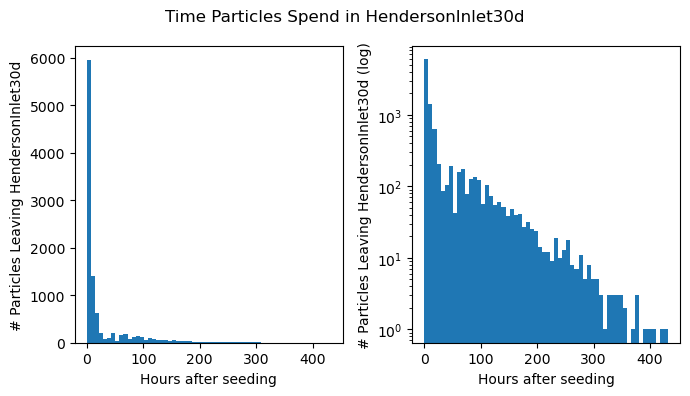

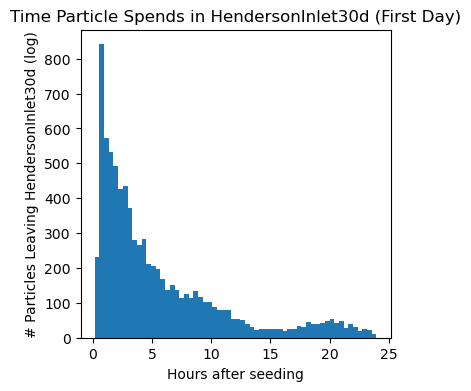

In [61]:
# Plot and save histogram

fage = dataf.final_age
fage_days = fage.values / np.timedelta64(1, 'h')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel(f'# Particles Leaving {regionName}')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel(f'# Particles Leaving {regionName} (log)')
fig.suptitle(f'Time Particles Spend in {regionName}')
plt.tight_layout()
plt.savefig(path+'/'+'RawHist')

fage_day1 = fage_days[~(fage_days > 24)]
fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title(f'Time Particle Spends in {regionName} (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel(f'# Particles Leaving {regionName} (log)')

plt.savefig(path+'/'+'FirstDayHist')

In [62]:
# Save stats in txt
print('Day 1 mean time (h)        = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (h)     = ' + str(np.mean(fage_days)))
print('Total stdev of time in (h) = ' + str(np.std(fage_days)))

with open(path+'/'+"outputStats.txt", "a") as file:
    file.write('\nDay 1 mean time (h)        = ' + str(np.mean(fage_day1)))
    file.write('\nDay 1 stdev of time in (h) = ' + str(np.std(fage_day1)))
    file.write('\nTotal mean time in (h)     = ' + str(np.mean(fage_days)))
    file.write('\nTotal stdev of time in (h) = ' + str(np.std(fage_days)))

Day 1 mean time (h)        = 5.614503514547662
Day 1 stdev of time in (h) = 5.495020714385102
Total mean time in (h)     = 26.39738718820517
Total stdev of time in (h) = 50.44609109188975


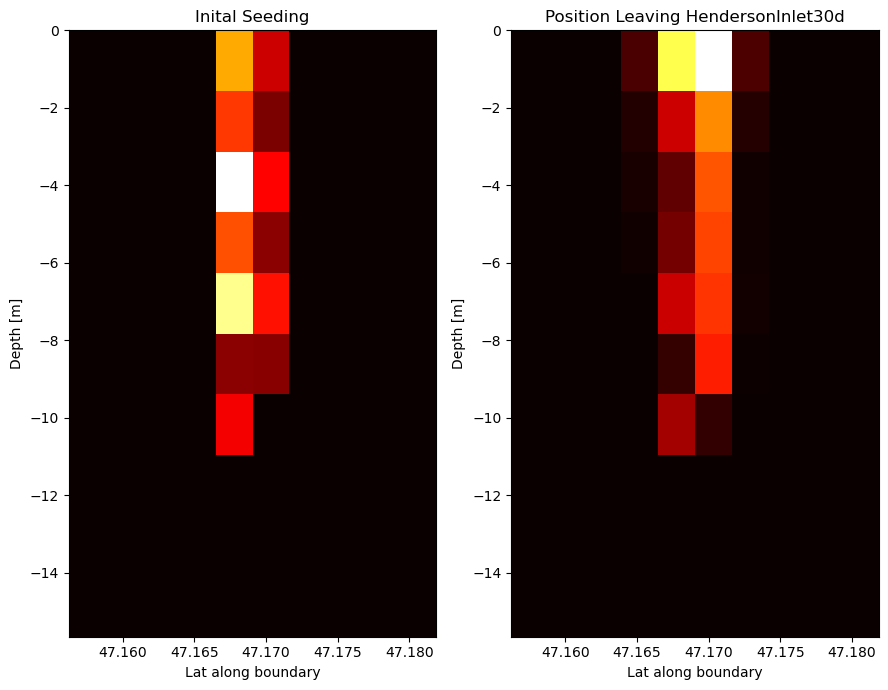

In [63]:
# Save 2d Histogram
nc_to_plot = nc.Dataset(outputf)
mesh_nc = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

fig, ax= plt.subplots(nrows=1, ncols=2, figsize =(9,7))

init_lat = dataf.init_lat.values
init_lon = dataf.init_lon.values
init_depth = dataf.init_depth.values

final_lat = dataf.final_lat.values
final_lon = dataf.final_lon.values
final_depth = dataf.final_depth.values

if isVert:
    xmin, xmax, ymin, ymax = min(final_lat)-0.01, max(final_lat)+0.01, min(final_depth)-5, 0
else:
    xmin, xmax, ymin, ymax = min(final_lon)-0.01, max(final_lon)+0.01, min(final_depth)-5, 0

if isVert:
    ax[0].hist2d(init_lat, init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
    ax[0].set_xlabel('Lat along boundary')
else:
    ax[0].hist2d(init_lon, init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
    ax[0].set_xlabel('Lon along boundary')
ax[0].set_ylabel('Depth [m]')
ax[0].set_title('Inital Seeding')


if isVert:
    ax[1].set_xlabel('Lat along boundary')
    ax[1].hist2d(final_lat, final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
else:
    ax[1].set_xlabel('Lon along boundary')
    ax[1].hist2d(final_lon, final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[1].set_ylabel('Depth [m]')
ax[1].set_title(f'Position Leaving {regionName}')

plt.tight_layout()
plt.savefig(path+'/'+'CrossSectionHist')

Day 1 mean time (h) = 15.932742888443052
Total mean time in (h) = 114.13580156162259


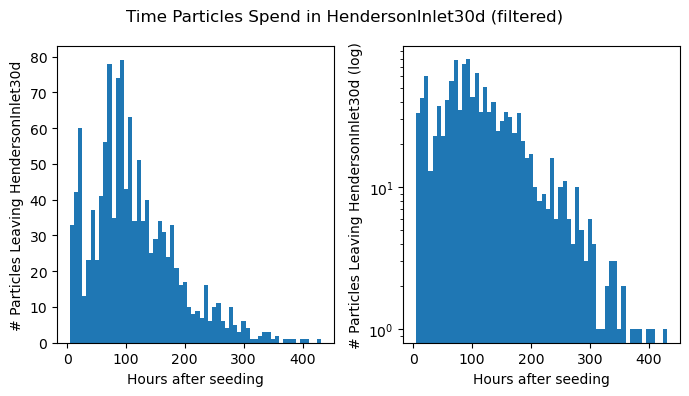

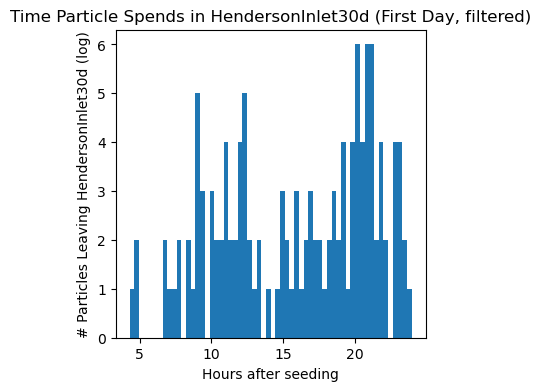

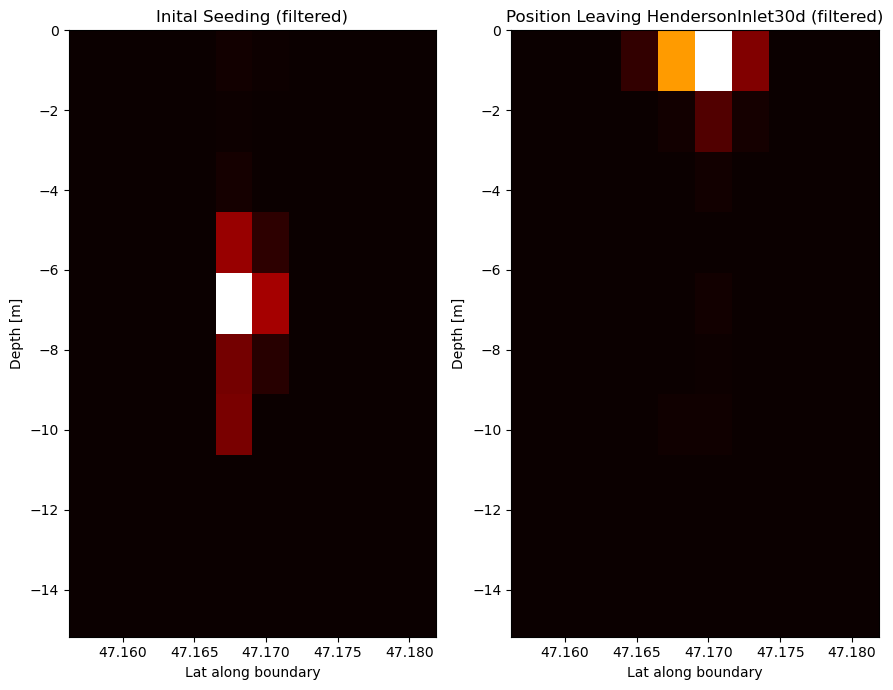

In [9]:
# Filtered value histogram and saved

fin_age = dataf.final_age.values / np.timedelta64(1, 'h')

tide_filter = ~((dataf.init_depth <= (dataf.final_depth) + 5) 
               & (dataf.init_depth >= (dataf.final_depth) - 5)) 
               #& (fin_age <= 13))

fage_filtered = fin_age[tide_filter]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
ax[0].hist(fage_filtered, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel(f'# Particles Leaving {regionName}')

ax[1].hist(fage_filtered, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel(f'# Particles Leaving {regionName} (log)')
fig.suptitle(f'Time Particles Spend in {regionName} (filtered)')
plt.tight_layout()
plt.savefig(path+'/'+'RawHist_filtered')

fage_day1 = fage_filtered[~(fage_filtered > 24)]
fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title(f'Time Particle Spends in {regionName} (First Day, filtered)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel(f'# Particles Leaving {regionName} (log)')

plt.savefig(path+'/'+'FirstDayHist_filtered')


print('Day 1 mean time (h) = ' + str(np.mean(fage_day1)))
print('Total mean time in (h) = ' + str(np.mean(fage_filtered)))
with open(path+'/'+"outputStats.txt", "a") as file:
    file.write('\n\nFiltered Data Stats')
    file.write('\nDay 1 mean time (h) = ' + str(np.mean(fage_day1)))
    file.write('\nTotal mean time in (h) = ' + str(np.mean(fage_filtered)))


dataf_filt = dataf.where(tide_filter, drop=True)

fig, ax= plt.subplots(nrows=1, ncols=2, figsize =(9,7))

init_lat = dataf_filt.init_lat.values
init_lon = dataf_filt.init_lon.values
init_depth = dataf_filt.init_depth.values

final_lat = dataf_filt.final_lat.values
final_lon = dataf_filt.final_lon.values
final_depth = dataf_filt.final_depth.values

if isVert:
    xmin, xmax, ymin, ymax = min(final_lat)-0.01, max(final_lat)+0.01, min(final_depth)-5, 0
else:
    xmin, xmax, ymin, ymax = min(final_lon)-0.01, max(final_lon)+0.01, min(final_depth)-5, 0

if isVert:
    ax[0].hist2d(init_lat, init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
    ax[0].set_xlabel('Lat along boundary')
else:
    ax[0].hist2d(init_lon, init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
    ax[0].set_xlabel('Lon along boundary')
ax[0].set_ylabel('Depth [m]')
ax[0].set_title('Inital Seeding (filtered)')


if isVert:
    ax[1].set_xlabel('Lat along boundary')
    ax[1].hist2d(final_lat, final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
else:
    ax[1].set_xlabel('Lon along boundary')
    ax[1].hist2d(final_lon, final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[1].set_ylabel('Depth [m]')
ax[1].set_title(f'Position Leaving {regionName} (filtered)')

plt.tight_layout()
# plt.savefig(path+'/'+'CrossSectionHist_filtered')